In [312]:
pip install cloudscraper

Note: you may need to restart the kernel to use updated packages.


Scraping data from the S&P 500 index

In [313]:
from bs4 import BeautifulSoup
import pandas as pd
import cloudscraper

url = 'https://www.slickcharts.com/sp500'
scraper = cloudscraper.create_scraper(browser = 'chrome') # you can try 'firefox' here too?
page = scraper.get(url).text  # get the raw html text
soup = BeautifulSoup(page, 'html.parser') # convert html text to BeautifulSoup object

table1 = soup.find('table', class_='table-borderless') # get the first table
table1_head = table1.find_all('th') # isolate the head since this has the column headers we want
table1_body = table1.find('tbody') # isolate table body since this has the data aka "guts"

# Get headers of table (i.e., #, Company, Symbol, etc)
headers = []
for i in table1_head:
    # extract just the value using .string (i.e., Company, Symbol, etc) and clean it up
    headers.append(i.string.text.strip())

# Get the "guts" aka all data 
all_data = []  # set up a list where we'll store our final data
rows = table1_body.find_all('tr') # get all the rows first, in each row there will be data
for row in rows:  # loop through each row
    cols = row.find_all('td') # in the given row, find the data we'll need
    cols = [ele.text.strip() for ele in cols] # extract the data for the given row and clean it up
    all_data.append([ele for ele in cols]) # add the current data to our python list called "all_data"

# Print everything out
print(headers)
for item in all_data[:10]: # [:10] means go through the first 10 items in the list, can change to 20, etc
    print(item)

['#', 'Company', 'Symbol', 'Weight', 'Price', 'Chg', '% Chg']
['1', 'Apple Inc.', 'AAPL', '6.356818', '143.44', '0.44', '(0.31%)']
['2', 'Microsoft Corporation', 'MSFT', '5.378502', '246.06', '3.35', '(1.38%)']
['3', 'Amazon.com Inc.', 'AMZN', '2.652952', '102.34', '1.79', '(1.78%)']
['4', 'Alphabet Inc. Class A', 'GOOGL', '1.721288', '97.97', '1.03', '(1.07%)']
['5', 'Berkshire Hathaway Inc. Class B', 'BRK.B', '1.646075', '309.56', '2.23', '(0.73%)']
['6', 'Alphabet Inc. Class C', 'GOOG', '1.541742', '99.01', '1.06', '(1.08%)']
['7', 'NVIDIA Corporation', 'NVDA', '1.419963', '194.51', '2.89', '(1.51%)']
['8', 'Exxon Mobil Corporation', 'XOM', '1.390268', '115.31', '1.75', '(1.54%)']
['9', 'UnitedHealth Group Incorporated', 'UNH', '1.349316', '496.24', '10.45', '(2.15%)']
['10', 'Tesla Inc', 'TSLA', '1.329799', '171.65', '4.99', '(2.99%)']


## Reshaping this data using pandas by sorting the firms by price and only including the top 10 firms

In [314]:
#Make a data frame with all this data
df = pd.DataFrame(all_data, columns=headers)


In [315]:
print(df)

       #                           Company Symbol    Weight   Price    Chg  \
0      1                        Apple Inc.   AAPL  6.356818  143.44   0.44   
1      2             Microsoft Corporation   MSFT  5.378502  246.06   3.35   
2      3                   Amazon.com Inc.   AMZN  2.652952  102.34   1.79   
3      4             Alphabet Inc. Class A  GOOGL  1.721288   97.97   1.03   
4      5   Berkshire Hathaway Inc. Class B  BRK.B  1.646075  309.56   2.23   
..   ...                               ...    ...       ...     ...    ...   
498  499           Lumen Technologies Inc.   LUMN  0.013937    5.16   0.02   
499  500           Fox Corporation Class B    FOX  0.013651   31.68   0.27   
500  501                       DaVita Inc.    DVA  0.013348   81.66   0.76   
501  502  DISH Network Corporation Class A   DISH  0.010213   14.19   0.23   
502  503          News Corporation Class B    NWS  0.007378   20.29  -0.07   

        % Chg  
0     (0.31%)  
1     (1.38%)  
2     (1.78%)  

In [316]:
#Check the data types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   #        503 non-null    object
 1   Company  503 non-null    object
 2   Symbol   503 non-null    object
 3   Weight   503 non-null    object
 4   Price    503 non-null    object
 5   Chg      503 non-null    object
 6   % Chg    503 non-null    object
dtypes: object(7)
memory usage: 27.6+ KB


In [317]:
#Check for missing values
df.isnull()

,#,Company,Symbol,Weight,Price,Chg,% Chg
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
498,False,False,False,False,False,False,False
499,False,False,False,False,False,False,False
500,False,False,False,False,False,False,False
501,False,False,False,False,False,False,False


In [318]:
df.isna().sum()

#          0
Company    0
Symbol     0
Weight     0
Price      0
Chg        0
% Chg      0
dtype: int64

Converting the data in each column to numeric data

In [319]:
#Change the Price and Change values from an object to a numeric datatype
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Chg'] = pd.to_numeric(df['Chg'], errors='coerce')

In [320]:
#Remove the Percentage Symbol and Brackets from the percentage change column
df['% Chg'] = df['% Chg'].str.replace('%', '')
df['% Chg'] = df['% Chg'].str.replace('(', '')
df['% Chg'] = df['% Chg'].str.replace(')', '')

C:\Users\akhil\AppData\Local\Temp\ipykernel_24492\180457599.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\akhil\AppData\Local\Temp\ipykernel_24492\180457599.py:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [321]:
#Sort the firms by price in descending order
df.sort_values("Price", ascending=False, inplace=True)


In [322]:
df = df.rename(columns={'Chg': 'Price Change',
                        '% Chg': 'Percentage Change'})


In [323]:
#Print the data for the top 10 firms
print(df.head(10))

       #                         Company Symbol    Weight   Price  \
147  148        O'Reilly Automotive Inc.   ORLY  0.146901  787.32   
98    99  Regeneron Pharmaceuticals Inc.   REGN  0.233739  757.14   
72    73                  BlackRock Inc.    BLK  0.333993  750.84   
108  109                    Equinix Inc.   EQIX  0.199396  735.51   
213  214    TransDigm Group Incorporated    TDG  0.108017  706.76   
24    25                   Broadcom Inc.   AVGO  0.700063  584.92   
277  278              W.W. Grainger Inc.    GWW  0.077177  584.48   
27    28   Thermo Fisher Scientific Inc.    TMO  0.657911  563.47   
190  191               MSCI Inc. Class A   MSCI  0.121236  520.00   
271  272                Ulta Beauty Inc.   ULTA  0.078385  511.68   

     Price Change Percentage Change  
147         -2.31             -0.29  
98          20.68              2.81  
72           2.98              0.40  
108         10.65              1.47  
213         -0.49             -0.07  
24          

In [324]:
#Create a new dataframe with the data for just the top 10 firms
df_10 = df.head(10)

In [325]:
print(df_10)

       #                         Company Symbol    Weight   Price  \
147  148        O'Reilly Automotive Inc.   ORLY  0.146901  787.32   
98    99  Regeneron Pharmaceuticals Inc.   REGN  0.233739  757.14   
72    73                  BlackRock Inc.    BLK  0.333993  750.84   
108  109                    Equinix Inc.   EQIX  0.199396  735.51   
213  214    TransDigm Group Incorporated    TDG  0.108017  706.76   
24    25                   Broadcom Inc.   AVGO  0.700063  584.92   
277  278              W.W. Grainger Inc.    GWW  0.077177  584.48   
27    28   Thermo Fisher Scientific Inc.    TMO  0.657911  563.47   
190  191               MSCI Inc. Class A   MSCI  0.121236  520.00   
271  272                Ulta Beauty Inc.   ULTA  0.078385  511.68   

     Price Change Percentage Change  
147         -2.31             -0.29  
98          20.68              2.81  
72           2.98              0.40  
108         10.65              1.47  
213         -0.49             -0.07  
24          

In [326]:
#checking for missing values with new dataframe
df_10.isna().sum()

#                    0
Company              0
Symbol               0
Weight               0
Price                0
Price Change         0
Percentage Change    0
dtype: int64

## Using visualisations to present the data from the dataframe

In [327]:
pip install plotnine

Note: you may need to restart the kernel to use updated packages.


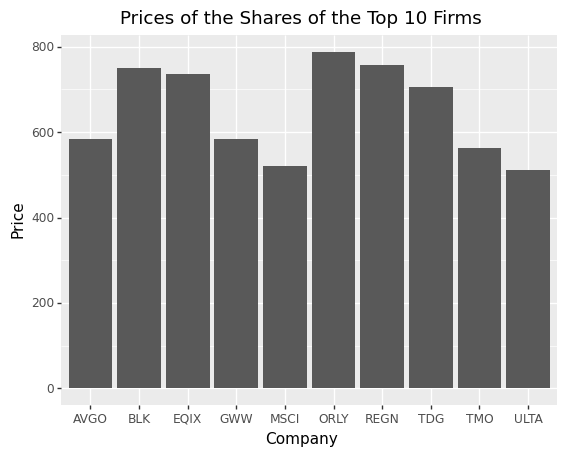

In [328]:
#Creating a bar chart using plotnine
from plotnine import *

# Create the bar chart using price data
print(ggplot(df_10[['Symbol', 'Price']], aes(x='Symbol', y='Price')) + \
    geom_bar(stat='identity') + \
    ggtitle('Prices of the Shares of the Top 10 Firms') + \
    xlab('Company') + \
    ylab('Price'))


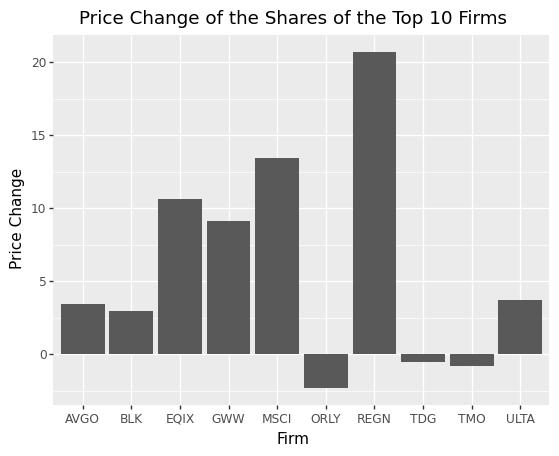

In [329]:
#Creating a bar chart for the price change 
print(ggplot(df_10[['Symbol', 'Price Change']], aes(x='Symbol', y='Price Change')) + \
    geom_bar(stat='identity') + \
    ggtitle('Price Change of the Shares of the Top 10 Firms') + \
    xlab('Firm') + \
    ylab('Price Change'))

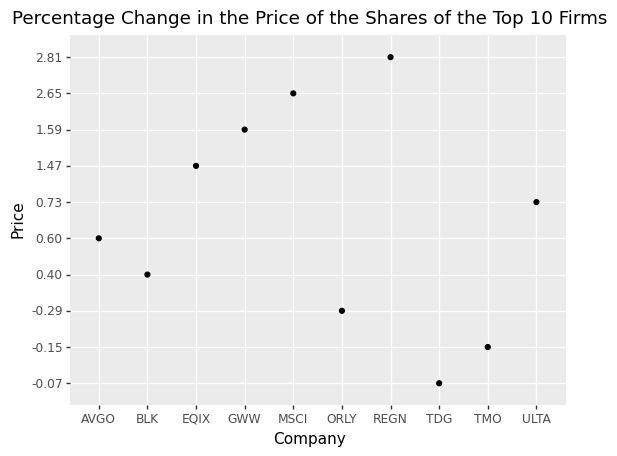

In [346]:
#chart to show percentage change
print(ggplot(df_10[['Symbol', 'Percentage Change']], aes(x='Symbol', y='Percentage Change')) + \
    geom_count(stat='identity') + \
    scale_y_discrete() + \
    ggtitle('Percentage Change in the Price of the Shares of the Top 10 Firms') + \
    xlab('Company') + \
    ylab('Price'))

## Finding the Sectors of these top firms

In [333]:
symbols = top_firm_symbol

In [334]:
#make a dataframe containing the sector information for the top 10 firms
import pandas as pd
from yahooquery import Ticker


tickers = Ticker(symbols, asynchronous=True)

datasi = tickers.get_modules("summaryProfile quoteType")
dfsi = pd.DataFrame.from_dict(datasi).T
dataframes = [pd.json_normalize([x for x in dfsi[module] if isinstance(x, dict)]) for
module in ['summaryProfile', 'quoteType']]

dfsi = pd.concat(dataframes, axis=1)

dfsi = dfsi.set_index('symbol')
dfsi = dfsi.loc[symbols]

print(dfsi[['industry', 'sector']])

                                industry              sector
symbol                                                      
ORLY                    Specialty Retail   Consumer Cyclical
REGN                       Biotechnology          Healthcare
BLK                     Asset Management  Financial Services
EQIX                      REIT—Specialty         Real Estate
TDG                  Aerospace & Defense         Industrials
AVGO                      Semiconductors          Technology
GWW              Industrial Distribution         Industrials
TMO               Diagnostics & Research          Healthcare
MSCI    Financial Data & Stock Exchanges  Financial Services
ULTA                    Specialty Retail   Consumer Cyclical


In [335]:
#Find how many firms are in each sector
dfsi.groupby('sector').size()

sector
Consumer Cyclical     2
Financial Services    2
Healthcare            2
Industrials           2
Real Estate           1
Technology            1
dtype: int64

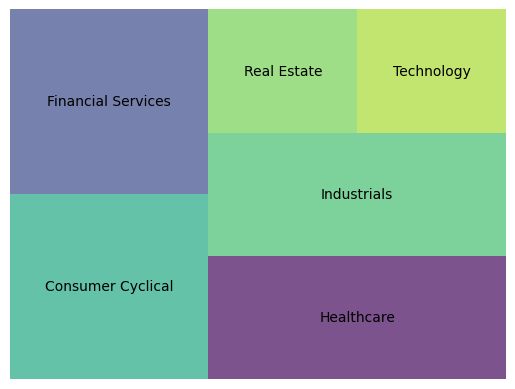

In [336]:
import squarify
import matplotlib.pyplot as plt

# Group the data by sector and count the number of companies in each sector
sector_count = dfsi.groupby('sector').size().reset_index(name='counts')

# Plot the treemap
squarify.plot(sizes=sector_count['counts'], label=sector_count['sector'], alpha=.7)

# Show the plot
plt.axis('off')
plt.show()


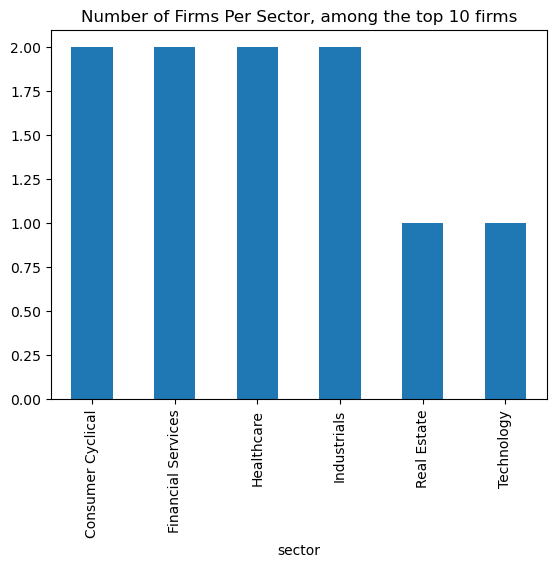

In [337]:
#Plot this data in a bar chart
dfsi.groupby('sector').size().plot(kind='bar')
plt.title("Number of Firms Per Sector, among the top 10 firms")
plt.show()


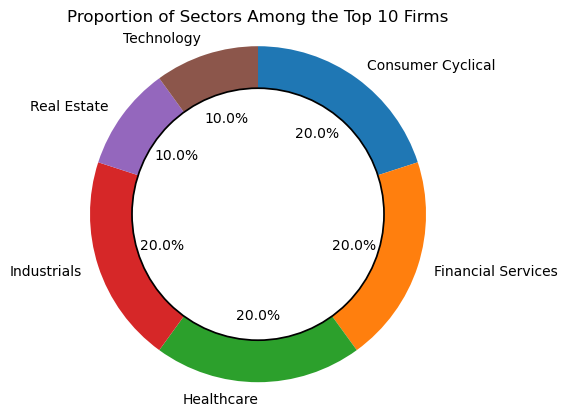

In [338]:
# Group the data by sector and get the size
grouped_data = dfsi.groupby('sector').size()

# Set the values and labels for the chart
values = grouped_data.values
labels = grouped_data.index

# Plot the doughnut chart
plt.pie(values, labels=labels, startangle=90, counterclock=False, autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.title("Proportion of Sectors Among the Top 10 Firms")
plt.show()

In [339]:
#New data frame containing the data of the top 20 firms
df_20 = df.head(20)

In [340]:
#List of the symbols of the top 20 firms
column_name_2 = 'Symbol'
column_list_symbol_2 = df_20[column_name_2].tolist()
top_20_firm_symbols = column_list_symbol_2[:20]
print(top_20_firm_symbols)

['ORLY', 'REGN', 'BLK', 'EQIX', 'TDG', 'AVGO', 'GWW', 'TMO', 'MSCI', 'ULTA', 'HUM', 'COST', 'ELV', 'UNH', 'LRCX', 'IDXX', 'BIO', 'LMT', 'NOW', 'NOC']


In [341]:
#Finding the sector information for the top 20 firms
import pandas as pd
from yahooquery import Ticker


tickers = Ticker(top_20_firm_symbols, asynchronous=True)

datasi = tickers.get_modules("summaryProfile quoteType")
dfsi = pd.DataFrame.from_dict(datasi).T
dataframes = [pd.json_normalize([x for x in dfsi[module] if isinstance(x, dict)]) for
module in ['summaryProfile', 'quoteType']]

dfsi = pd.concat(dataframes, axis=1)

dfsi = dfsi.set_index('symbol')
dfsi = dfsi.loc[top_20_firm_symbols]

print(dfsi[['industry', 'sector']])

                                   industry              sector
symbol                                                         
ORLY                       Specialty Retail   Consumer Cyclical
REGN                          Biotechnology          Healthcare
BLK                        Asset Management  Financial Services
EQIX                         REIT—Specialty         Real Estate
TDG                     Aerospace & Defense         Industrials
AVGO                         Semiconductors          Technology
GWW                 Industrial Distribution         Industrials
TMO                  Diagnostics & Research          Healthcare
MSCI       Financial Data & Stock Exchanges  Financial Services
ULTA                       Specialty Retail   Consumer Cyclical
HUM                        Healthcare Plans          Healthcare
COST                        Discount Stores  Consumer Defensive
ELV                        Healthcare Plans          Healthcare
UNH                        Healthcare Pl

In [342]:
#Finding how many firms from the top 20 are in each sector
dfsi.groupby('sector').size()

sector
Consumer Cyclical     2
Consumer Defensive    1
Financial Services    2
Healthcare            7
Industrials           4
Real Estate           1
Technology            3
dtype: int64

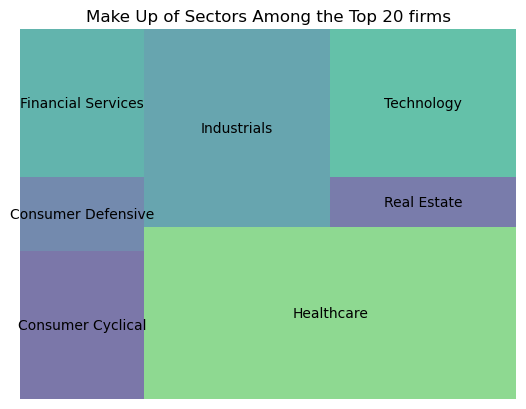

In [352]:
import squarify
import matplotlib.pyplot as plt

# Group the data by sector and count the number of companies in each sector
sector_count = dfsi.groupby('sector').size().reset_index(name='counts')

# Plot the treemap
squarify.plot(sizes=sector_count['counts'], label=sector_count['sector'], alpha=.7)

# Show the plot
plt.title('Make Up of Sectors Among the Top 20 firms')
plt.axis('off')
plt.show()


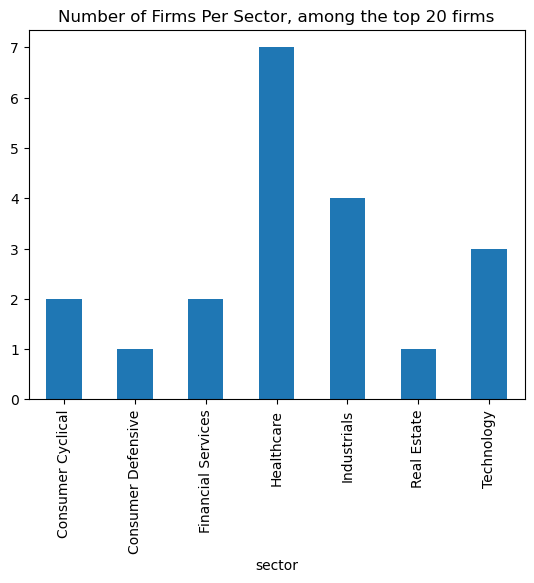

In [344]:
#Plot this data in a bar chart
dfsi.groupby('sector').size().plot(kind='bar')
plt.title("Number of Firms Per Sector, among the top 20 firms")
plt.show()

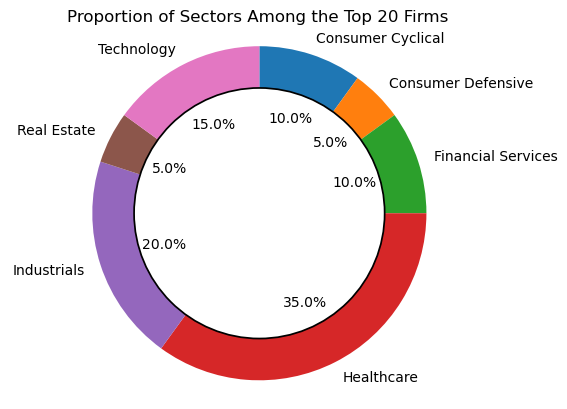

In [345]:
# Group the data by sector and get the size
grouped_data = dfsi.groupby('sector').size()

# Set the values and labels for the chart
values = grouped_data.values
labels = grouped_data.index

# Plot the doughnut chart
plt.pie(values, labels=labels, startangle=90, counterclock=False, autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  # Make the chart a circle
plt.title("Proportion of Sectors Among the Top 20 Firms")
plt.show()